Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\test.csv')
df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [92]:
df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [91]:
df.shape

(1000, 22)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [94]:
df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000,0.955000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201,0.848348
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000,2.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000,2.000000


In this dataset we have to predict the price range not the actual price.
So we do not have the domain knowledge, we can predict the price range by Elbow Method.

In [3]:
x = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values
x

array([[1.043e+03, 1.000e+00, 1.800e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.410e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.807e+03, 1.000e+00, 2.800e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.185e+03, 0.000e+00, 1.400e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.533e+03, 1.000e+00, 5.000e-01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.270e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [4]:
from sklearn.cluster import KMeans

### Elbow Method

In [5]:
inertia = []
for i in range(1,31):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=1)
    km.fit(x)
    inertia.append(km.inertia_)

In [6]:
inertia

[1751624899.20094,
 862853287.2201977,
 700868145.0105304,
 609872839.7657746,
 540420702.1426412,
 490476214.7828038,
 449838718.2130875,
 421709874.79532146,
 394089546.343515,
 374928802.4840133,
 353998557.83615637,
 334824953.073415,
 319999152.1826168,
 302735202.61512417,
 292581242.12384063,
 279466108.9028269,
 270642049.84222263,
 258907633.4061486,
 248947724.5370626,
 242510551.43620825,
 236347771.3292517,
 229155003.42753556,
 223376044.3591588,
 216373129.0322503,
 211654423.16729993,
 206579596.21250102,
 200185499.08988923,
 198479821.52015033,
 193577797.76088086,
 189713750.56239966]

<function matplotlib.pyplot.show(close=None, block=None)>

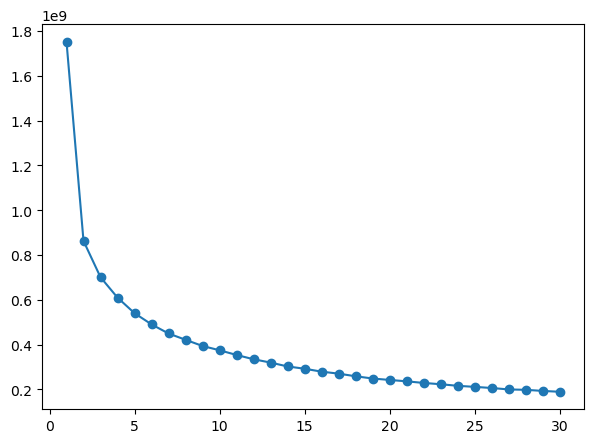

In [7]:
plt.figure(figsize=(7,5))
plt.plot(range(1,31),inertia,marker='o')
plt.show

In [8]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=1)
labels=km.fit_predict(x)

In [9]:
labels

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0,
       2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1,
       1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2,
       1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2,
       2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1,
       1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2,

In [10]:
df['price_range'] = labels

In [11]:
df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,2
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,1
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


### According the Information we get from the dataset:-
    0 = Expensive
    1 = Bit Expensive
    2 = Affordable

In [12]:
df['price_range'].unique()

array([0, 2, 1])

# VISUALIZATIONS

<AxesSubplot:xlabel='price_range', ylabel='count'>

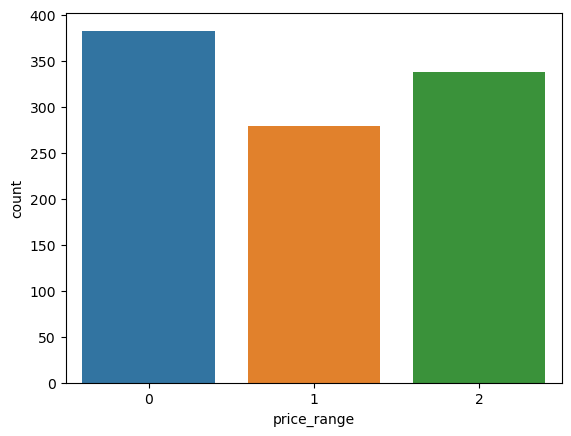

In [13]:
sns.countplot(x='price_range',data=df)

In [14]:
def plots(x):
    plt.figure(figsize=(7,4))
    plt.subplot(1,2,1)
    sns.histplot(df[x])
    plt.subplot(1,2,2)
    sns.distplot(df[x])
    plt.tight_layout(pad = 1.0)
    plt.axvline(df[x].mean(),color='red',label='mean')
    plt.axvline(df[x].median(),color='black',label='median')
    plt.legend()

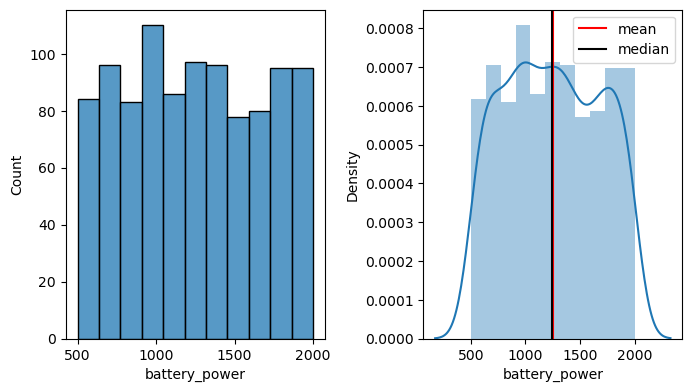

In [15]:
plots('battery_power')

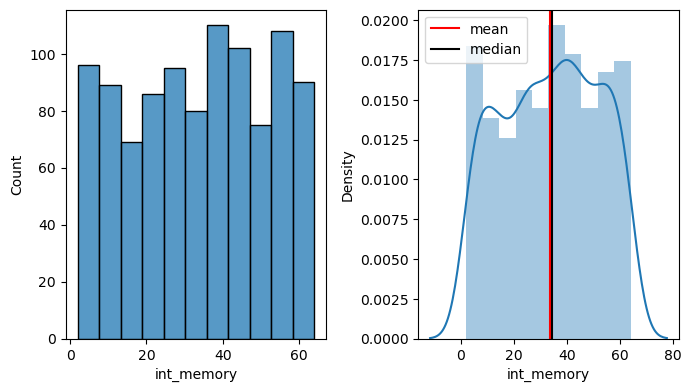

In [16]:
plots('int_memory')

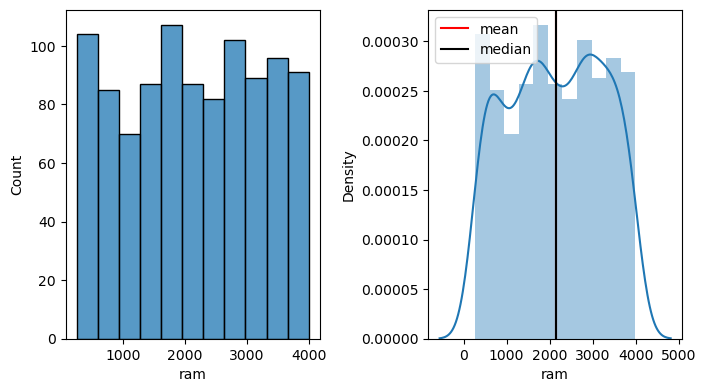

In [17]:
plots('ram')

<AxesSubplot:xlabel='wifi', ylabel='count'>

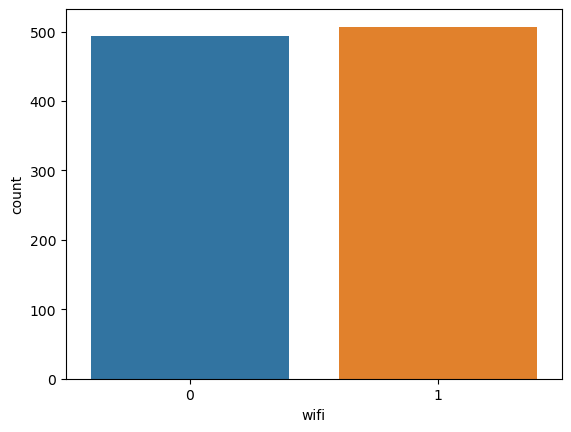

In [18]:
sns.countplot(x='wifi',data=df)

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

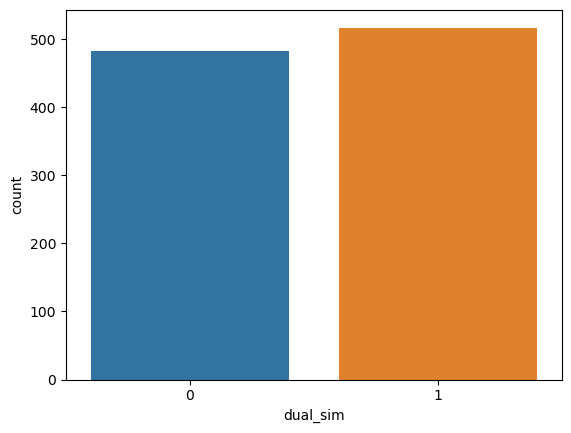

In [19]:
sns.countplot(x='dual_sim',data=df)

<AxesSubplot:xlabel='blue', ylabel='count'>

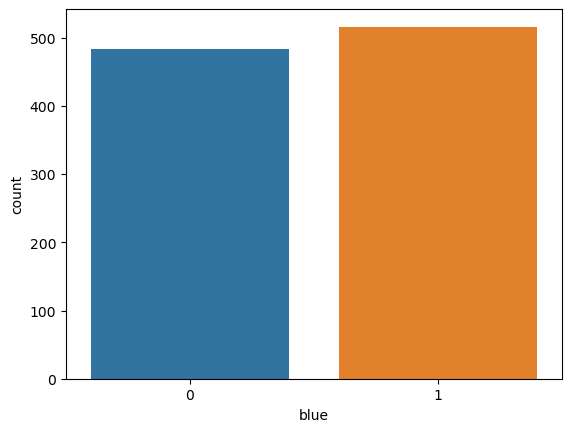

In [20]:
sns.countplot(x='blue',data=df)

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

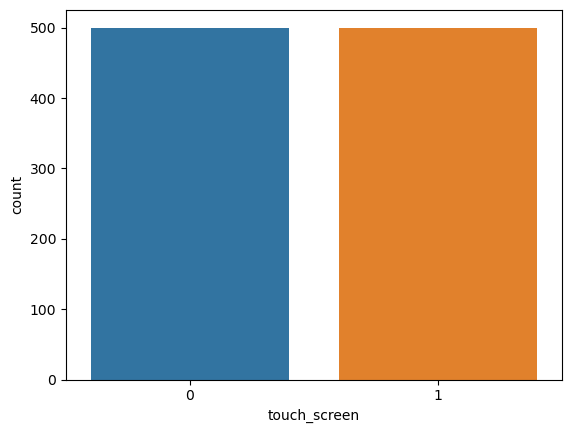

In [21]:
sns.countplot(x='touch_screen',data=df)

<AxesSubplot:ylabel='three_g'>

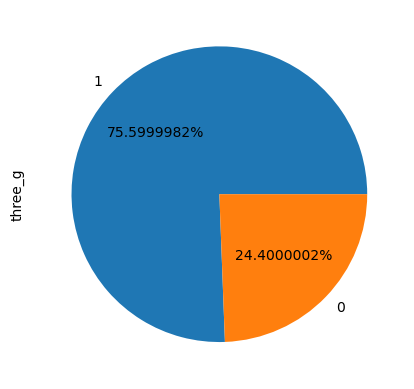

In [22]:
df['three_g'].value_counts().plot(kind='pie',autopct='%1f2%%')

<AxesSubplot:ylabel='four_g'>

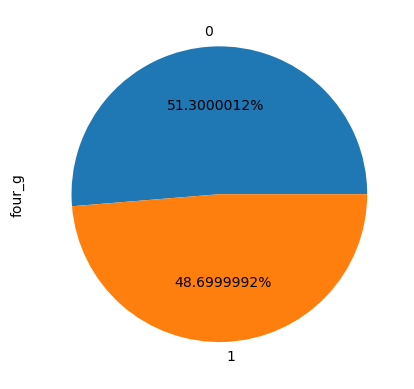

In [23]:
df['four_g'].value_counts().plot(kind='pie',autopct='%1f2%%')

In [54]:
korr = df.corr()
korr

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,1.000000,-0.021511,0.000464,0.035917,-0.002721,0.016934,0.030921,-0.014023,-0.002794,-0.007541,...,-0.025056,-0.012138,-0.043442,-0.011972,0.002918,0.030807,4.957099e-02,3.976791e-02,-0.036643,0.076493
battery_power,-0.021511,1.000000,-0.046610,-0.039075,-0.061171,-0.007846,-0.042520,0.003751,-0.009065,-0.047065,...,0.048647,0.053365,-0.032366,-0.055665,-0.023905,0.015546,3.151417e-02,-1.013784e-02,-0.000414,0.061677
blue,0.000464,-0.046610,1.000000,0.034754,-0.011100,-0.056063,-0.001169,-0.012416,0.018319,0.023513,...,-0.058810,-0.032054,0.057570,0.012780,0.004223,-0.031995,1.352986e-02,-6.003074e-02,0.025568,-0.046679
clock_speed,0.035917,-0.039075,0.034754,1.000000,-0.012423,0.010127,-0.024665,-0.030487,0.016995,-0.014107,...,0.017277,0.070585,-0.000650,-0.039503,-0.027138,-0.078797,-2.140644e-02,6.189276e-02,-0.048593,0.009449
dual_sim,-0.002721,-0.061171,-0.011100,-0.012423,1.000000,0.057606,0.024907,-0.012158,0.021760,-0.001734,...,0.006842,0.015610,0.048171,0.006295,-0.002064,0.004390,6.895838e-04,3.401967e-02,0.031545,-0.051296
fc,0.016934,-0.007846,-0.056063,0.010127,0.057606,1.000000,0.032832,-0.006565,0.020859,0.018353,...,-0.017982,0.030550,-0.051997,0.045158,0.006115,-0.051458,-1.112104e-02,1.546706e-02,-0.060373,0.044859
four_g,0.030921,-0.042520,-0.001169,-0.024665,0.024907,0.032832,1.000000,-0.037488,0.014806,-0.000509,...,0.033655,0.036545,0.030821,-0.015087,-0.000893,0.013692,5.535283e-01,-1.000338e-02,-0.035652,0.011597
int_memory,-0.014023,0.003751,-0.012416,-0.030487,-0.012158,-0.006565,-0.037488,1.000000,-0.004386,-0.010447,...,-0.009564,-0.003877,-0.007107,-0.009249,0.024521,0.023759,-1.592239e-02,2.218589e-02,0.011860,-0.017747
m_dep,-0.002794,-0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,-0.004386,1.000000,-0.041994,...,0.062559,0.034861,0.018349,-0.026160,-0.023393,0.024124,-2.927827e-02,4.025363e-02,-0.039705,0.031876
mobile_wt,-0.007541,-0.047065,0.023513,-0.014107,-0.001734,0.018353,-0.000509,-0.010447,-0.041994,1.000000,...,0.011157,-0.014577,0.028786,-0.022053,0.022148,-0.021704,6.261881e-03,4.452531e-02,0.069762,0.010394


<AxesSubplot:>

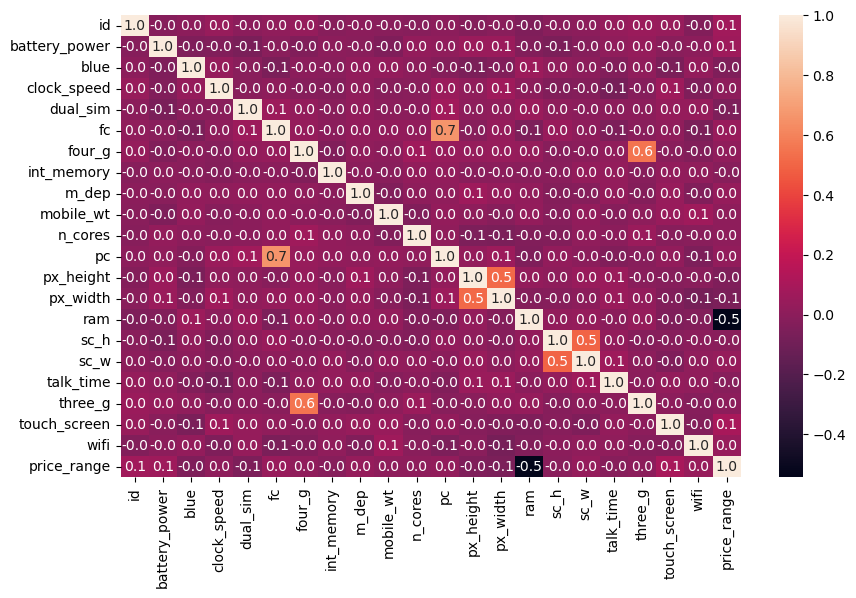

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(korr,annot=True,fmt='.1f')

### VISUALIZATIONS INSIGHTS

The insights we get by Visualzing the dataset.

     > Seems like people are more likely to buy a Expensive phone than the affordable one.
     > The need of Wifi,Bluetooth and dual sim are higher wherelse the number of touch screens are balanced.
     > the number of Three G phones are higher than the numbers of Four G phones.
     

# MODEL

In [24]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [27]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [28]:
from sklearn.metrics import classification_report,accuracy_score

In [29]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print('Accuracy Score :',accuracy_score(y_test,y_pred))
    
    train = model.score(X_train,y_train)
    test = model.score(X_test,y_test)
    
    print('Training Performance',train)
    print('Testing Performnace',test)
    
    return model

#### Logistic Regression

In [30]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.96      0.91      0.93        53
           2       0.85      0.81      0.83        72

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Accuracy Score : 0.88
Training Performance 0.88
Testing Performnace 0.88


LogisticRegression()

#### KNN

In [31]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       0.96      0.92      0.94        53
           2       0.92      0.92      0.92        72

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy Score : 0.94
Training Performance 0.98125
Testing Performnace 0.94


KNeighborsClassifier()

#### SVM

In [32]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.98      0.99        53
           2       0.99      0.97      0.98        72

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.98      0.98       200

Accuracy Score : 0.985
Training Performance 0.98875
Testing Performnace 0.985


SVC()

#### Decision Tree

In [33]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       0.98      0.98      0.98        53
           2       0.99      0.97      0.98        72

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Accuracy Score : 0.985
Training Performance 1.0
Testing Performnace 0.985


DecisionTreeClassifier()

In [34]:
svm = SVC(kernel='linear')

In [35]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       0.98      1.00      0.99        53
           2       1.00      0.99      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Accuracy Score : 0.995
Training Performance 1.0
Testing Performnace 0.995


SVC(kernel='linear')

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C':[1,10],'gamma':[1,10]}

In [38]:
gs = GridSearchCV(svm,param_grid,verbose=3)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.994 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.994 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=3)

In [39]:
gs.best_params_

{'C': 1, 'gamma': 1}

In [40]:
mymodel(gs)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.994 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.994 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=1.000 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=3)

In [41]:
svm = SVC(kernel='linear',C=1,gamma=1)

In [42]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       0.98      1.00      0.99        53
           2       1.00      0.99      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Accuracy Score : 0.995
Training Performance 1.0
Testing Performnace 0.995


SVC(C=1, gamma=1, kernel='linear')

#### XGBOOST

In [43]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
from xgboost import XGBClassifier

In [52]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score ',accuracy_score(y_test,y_pred))

train = xg.score(X_train,y_train)
test = xg.score(X_test,y_test)
    
print('Training Performance',train)
print('Testing Performnace',test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       0.98      0.98      0.98        53
           2       0.99      0.97      0.98        72

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Accuracy Score :  0.985
Training Performance 1.0
Testing Performnace 0.985


#### RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

train = rf.score(X_train,y_train)
test = rf.score(X_test,y_test)
    
print('Training Performance',train)
print('Testing Performnace',test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       0.98      0.96      0.97        53
           2       0.97      0.97      0.97        72

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Accuracy Score :  0.98
Training Performance 1.0
Testing Performnace 0.98


### ACCURACY RESULTS

In [88]:
Accuracy_Results = pd.DataFrame({'Logistic Regression':[0.88],'KNN':[0.94],'Decision tree':[0.98],'SVM':[0.995],'Xgboost':[0.985],'Random Forest':[0.98]},index=['Accuracy'])

In [89]:
Accuracy_Results

,Logistic Regression,KNN,Decision tree,SVM,Xgboost,Random Forest
Accuracy,0.88,0.94,0.98,0.995,0.985,0.98


 The Models have perfectly been trained and predicted the split testset with High accuracy.

# CONCLUSION

In this project of Mobile Price Classiification we have to predict the price range of a mobile phone that the person can purchase.


First we clean the data by seeing if there are no null values or columns are not in the correct datatype.

By appyling the Elbow Method we get the predicted price range.

Then we visualize the dataset by the help of various tool like countplot,distplot,heatmap and pie diagram.

Then we build the model by applying algorithms. 

All the models are working properly and the Support Vector Machine(SVM) gives you the highest accuracy score.